# Análisis Exploratorio de Datos (EDA) + Regresión Lineal  
## Dataset: Wine Quality – Vino Tinto

Este notebook sigue la **“Guía Detallada: Plantilla de Código para EDA”** adaptada al dataset de calidad de vino tinto (`winequality-red.csv`). :contentReference[oaicite:0]{index=0}  

**Objetivo:**  
Realizar un EDA completo y entrenar un modelo de **Regresión Lineal** para predecir la variable objetivo **`quality`** (calidad del vino tinto) a partir de sus características fisicoquímicas.

---

## PASO 1: IMPORTAR LIBRERÍAS Y CONFIGURACIÓN


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

# Configuración adicional para formato y visualización
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme(style="whitegrid")

### Análisis PASO 1

En esta celda se importan las librerías necesarias para:

- **Manipulación y análisis de datos:** `pandas`, `numpy`.  
- **Visualización:** `matplotlib`, `seaborn`.  
- **Preprocesamiento y modelado:** `LabelEncoder`, `MinMaxScaler`, `train_test_split`, `LinearRegression`, métricas de evaluación.  
- **Estadística:** `shapiro` para futuros tests de normalidad (si se requiere).  

####Además, se configura el formato de impresión de números en `pandas` y un estilo visual general para las gráficas con `seaborn`, lo que hace los resultados más legibles y profesionales.
---

## PASO 2: IMPORTAR Y EXPLORAR DATOS


In [252]:
# URL del dataset (vino tinto)
datos_vinos = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";"
)

datos_vinos


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5


In [254]:
# Crear una copia de trabajo para no alterar los datos originales
datos_trabajo = datos_vinos.copy()

In [255]:
# Mostrar primeras filas
print("=== PRIMERAS 5 FILAS DEL DATASET ===")
display(datos_trabajo.head())

=== PRIMERAS 5 FILAS DEL DATASET ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [256]:
# Mostrar dimensiones del dataset
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")


Dimensiones del dataset: (1599, 12)


### Análisis PASO 2

El dataset cargado corresponde a **vino tinto**, con características fisicoquímicas por fila (cada fila es una muestra de vino).

- Dimensiones esperadas del dataset: **1.599 filas** y **12 columnas** (1.599 vinos evaluados y 12 variables).  
- Cada columna representa una propiedad del vino, por ejemplo:
  - `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, etc.  
  - `alcohol`: porcentaje de alcohol del vino.  
  - **`quality`**: es la **variable objetivo**, una calificación sensorial de la calidad del vino (típicamente en escala entera de 0 a 10, usualmente concentrada entre 3 y 8 para este dataset).

#####Esta estructura es adecuada para un problema de **regresión**, donde se busca predecir la calidad (`quality`) a partir de las demás variables numéricas.
---

## PASO 3: REVISAR DATOS NaN, INFO Y DESCRIPTIVOS


In [257]:
# Crear valores NaN en 10% de las filas para cada columna numérica
porcentaje_nan = 0.10  # 10%
rng = np.random.default_rng(seed=42)  # para reproducibilidad

# Seleccionar las 3 columnas donde quieres introducir NaN
columnas_nan = ["alcohol", "pH", "chlorides"]  # <-- MODIFICA ESTO

for col in columnas_nan:
    n_filas = int(len(datos_trabajo) * porcentaje_nan)
    indices = rng.choice(datos_trabajo.index, size=n_filas, replace=False)
    datos_trabajo.loc[indices, col] = np.nan

In [258]:
datos_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1440 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1440 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1440 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [259]:
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
display(datos_trabajo.describe())


=== ESTADÍSTICOS DESCRIPTIVOS ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.00","1,599.00","1,599.00","1,599.00","1,440.00","1,599.00","1,599.00","1,599.00","1,440.00","1,599.00","1,440.00","1,599.00"
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.04,10.46,32.90,0.00,0.16,0.17,1.06,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.10,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [260]:
print("\n=== VALORES FALTANTES POR COLUMNA ===")
na_counts = datos_trabajo.isna().sum()
display(na_counts)


=== VALORES FALTANTES POR COLUMNA ===


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,159
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,159
sulphates,0


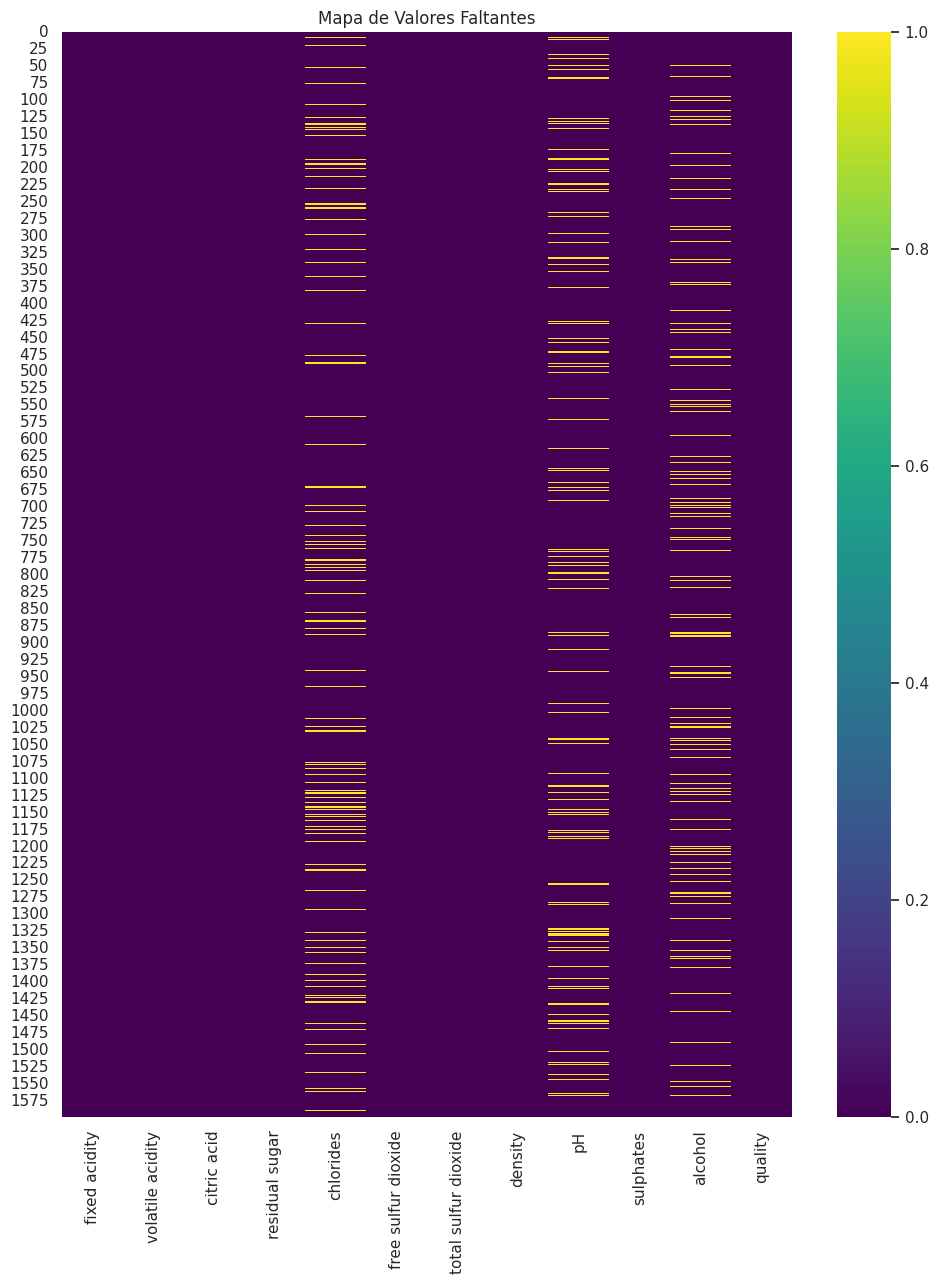

In [261]:
plt.figure(figsize=(10, 13))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

## Análisis PASO 3

En este paso se generó intencionalmente un **10% de valores faltantes (NaN)** en cada columna del dataset, con el fin de:

- Simular condiciones reales de datos incompletos.
- Evaluar la capacidad del EDA para detectarlos.
- Posteriormente permitir aplicar técnicas de imputación (si se requiriera).

Después de generar los NaN:

- `datos_trabajo.info()` confirma que cada columna tiene ahora valores faltantes.
- El conteo de `isna().sum()` muestra aproximadamente 159 NaN por columna (10% de 1599 filas).
- El *heatmap* permite visualizar claramente los puntos donde hay datos faltantes.

Este proceso es útil para prácticas de limpieza y permite demostrar cómo tratar datos incompletos durante un EDA profesional.

## PASO 4: LIMPIAR DATOS

In [262]:
datos_trabajo.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,159
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,159
sulphates,0


In [263]:
datos_trabajo.isna().sum().sum()

np.int64(477)

<Axes: ylabel='Density'>

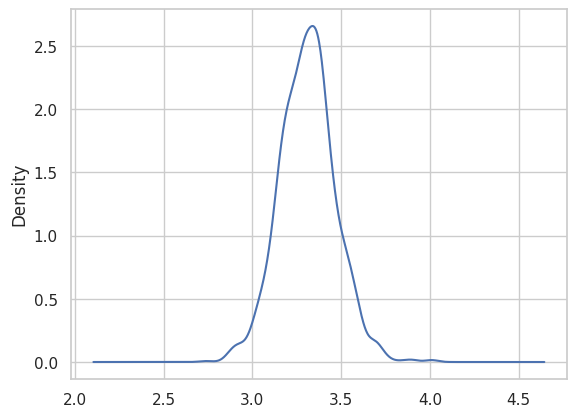

In [264]:
datos_trabajo['pH'].plot(kind='kde')

In [265]:
datos_trabajo['pH'].fillna(datos_trabajo['pH'].median(), inplace=True)

In [266]:
datos_trabajo.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,159
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: ylabel='Density'>

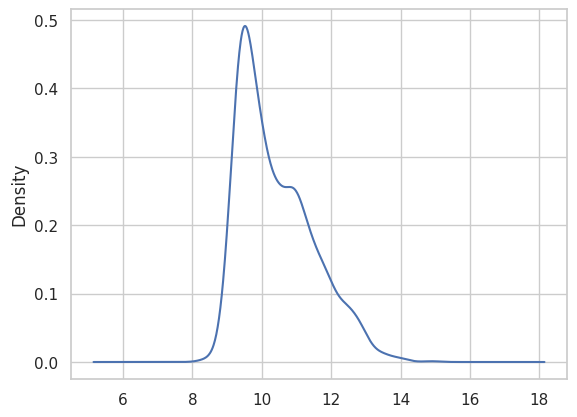

In [267]:
datos_trabajo['alcohol'].plot(kind='kde')

In [268]:
datos_trabajo['alcohol'].fillna(datos_trabajo['alcohol'].median(), inplace=True)

In [269]:
datos_trabajo.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,159
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: ylabel='Density'>

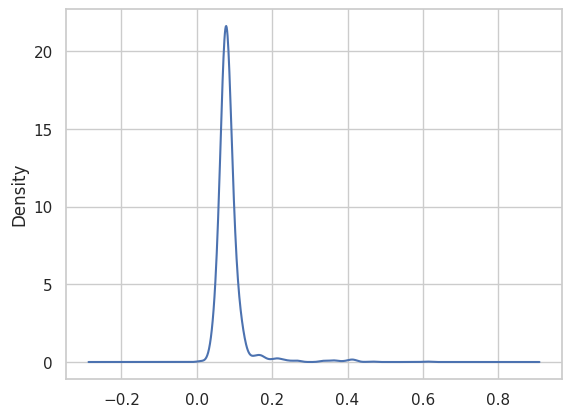

In [270]:
datos_trabajo['chlorides'].plot(kind='kde')

In [271]:
datos_trabajo['chlorides'].fillna(datos_trabajo['chlorides'].median(), inplace=True)

In [272]:
datos_trabajo.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### Análisis PASO 4

Se aplicó una **estrategia de imputación con la mediana** para las columnas:

- **`alcohol`**
- **`pH`**
- **`chlorides`**

Cada una de estas columnas contenía aproximadamente **159 valores NaN** (10% del total de filas). La mediana es una medida robusta, por lo que es una buena elección para mantener la distribución de los datos sin verse excesivamente influida por valores extremos.

Tras la imputación, el conteo de valores faltantes es cero en todas las columnas, lo que deja el dataset **sin datos NaN** y listo para el modelado posterior sin necesidad de eliminar filas completas.


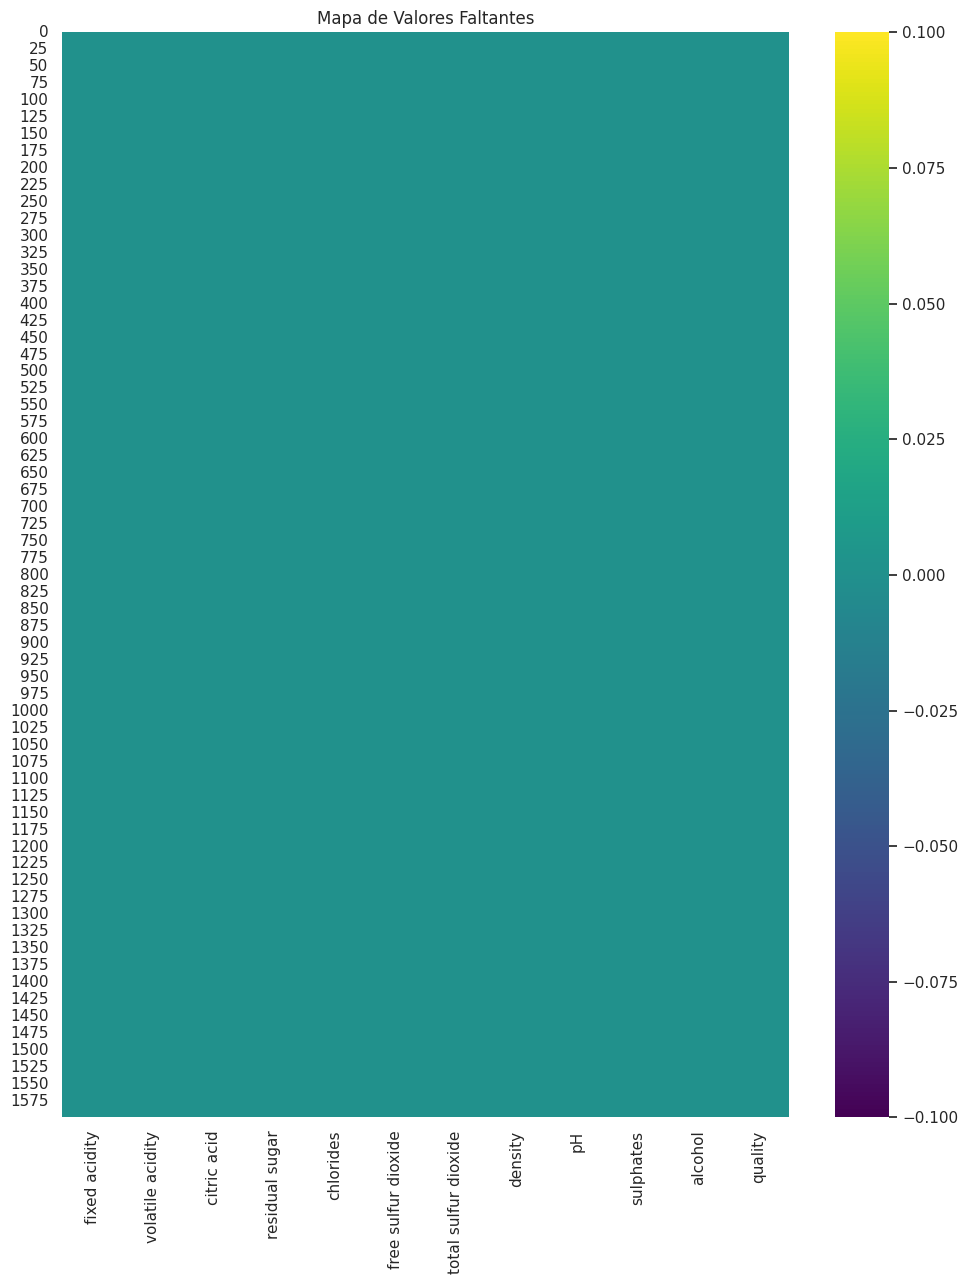

In [273]:
plt.figure(figsize=(10, 13))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

# PASO 5: VISUALIZACIÓN DE LA VARIABLE OBJETIVO



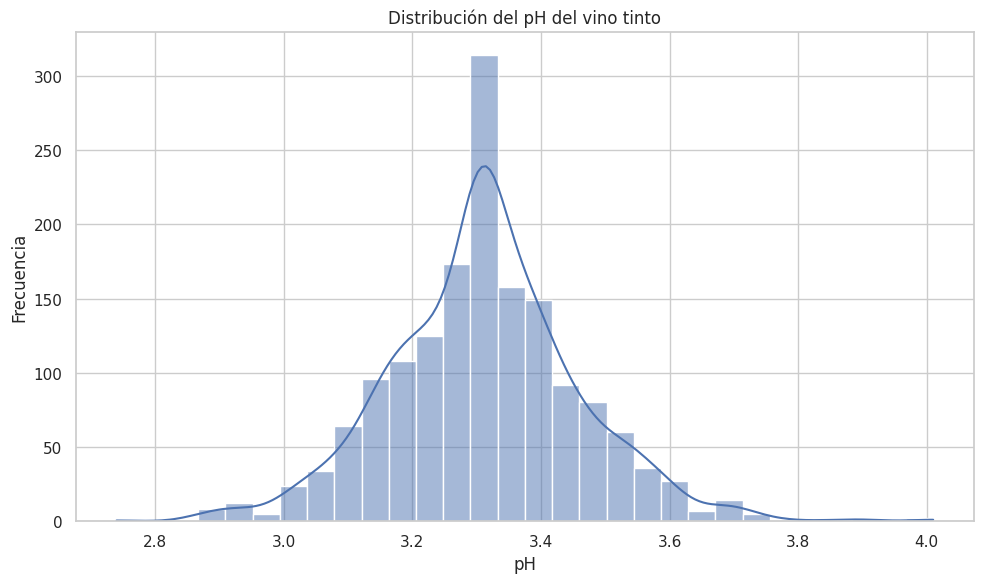

In [274]:
plt.figure(figsize=(10, 6))
sns.histplot(datos_trabajo['pH'], kde=True, bins=30)
plt.title('Distribución del pH del vino tinto')
plt.xlabel('pH')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### 📊 Análisis: Distribución del pH del vino tinto

- La distribución del pH muestra una forma aproximadamente normal, con la mayor concentración de valores entre 3.1 y 3.4.
- Esto indica que la mayoría de los vinos presentan una acidez moderada y estable.
- Esta ligera simetría implica que el pH es una variable adecuada para el análisis y probablemente no requiere transformaciones adicionales.


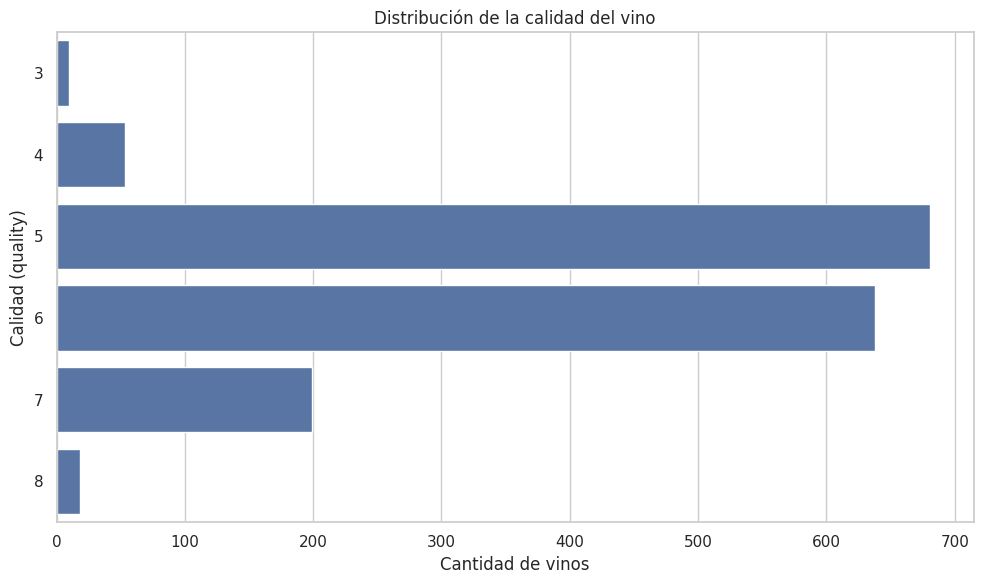

In [275]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=datos_trabajo,
    y='quality',
    order=datos_trabajo['quality'].value_counts().sort_index().index
)
plt.title('Distribución de la calidad del vino')
plt.xlabel('Cantidad de vinos')
plt.ylabel('Calidad (quality)')
plt.tight_layout()
plt.show()

### 📊 Análisis: Distribución de la calidad del vino

- La calidad del vino se concentra principalmente en los valores 5 y 6, mientras que las calidades extremas como 3, 4, 7 y 8 aparecen con baja frecuencia.
- Este claro desequilibrio de clases puede dificultar que un modelo predictivo aprenda patrones en los valores menos representados.
- Esto significa que el modelo tenderá a predecir valores centrales a menos que se utilicen técnicas de balanceo.


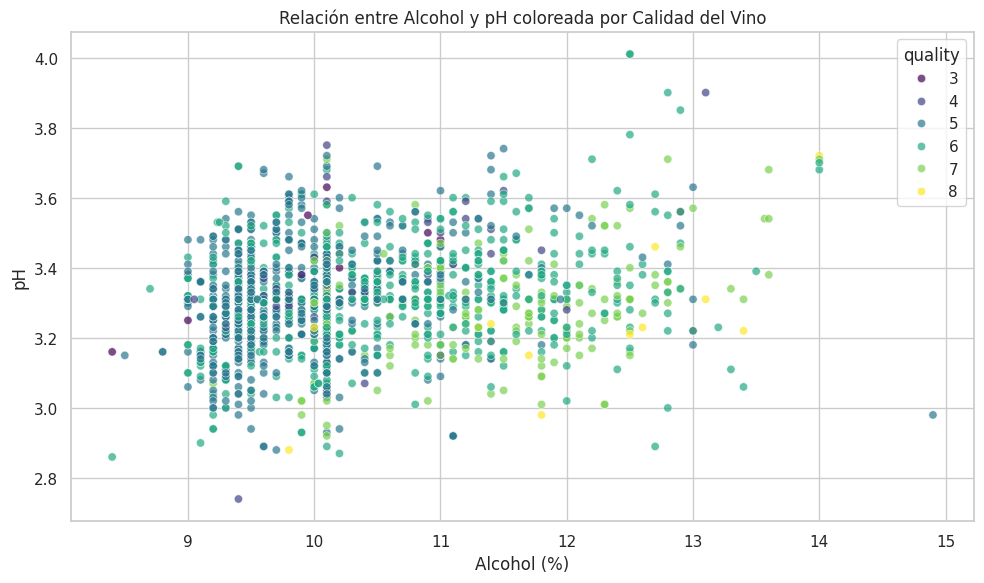

In [276]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='alcohol',
    y='pH',
    hue='quality',
    data=datos_trabajo,
    palette='viridis',
    alpha=0.7
)
plt.title('Relación entre Alcohol y pH coloreada por Calidad del Vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('pH')
plt.tight_layout()
plt.show()


### 📊 Análisis: Relación entre Alcohol y pH coloreada por Nivel de Calidad

- El gráfico muestra que no existe una relación lineal fuerte entre el alcohol y el pH, ya que los puntos aparecen dispersos sin una tendencia clara.
- Sin embargo, los vinos de mayor calidad tienden a concentrarse en valores ligeramente más altos de alcohol.
- Esto sugiere que, aunque el pH no está directamente relacionado con el alcohol, el contenido alcohólico podría influir más significativamente en la calidad del vino.


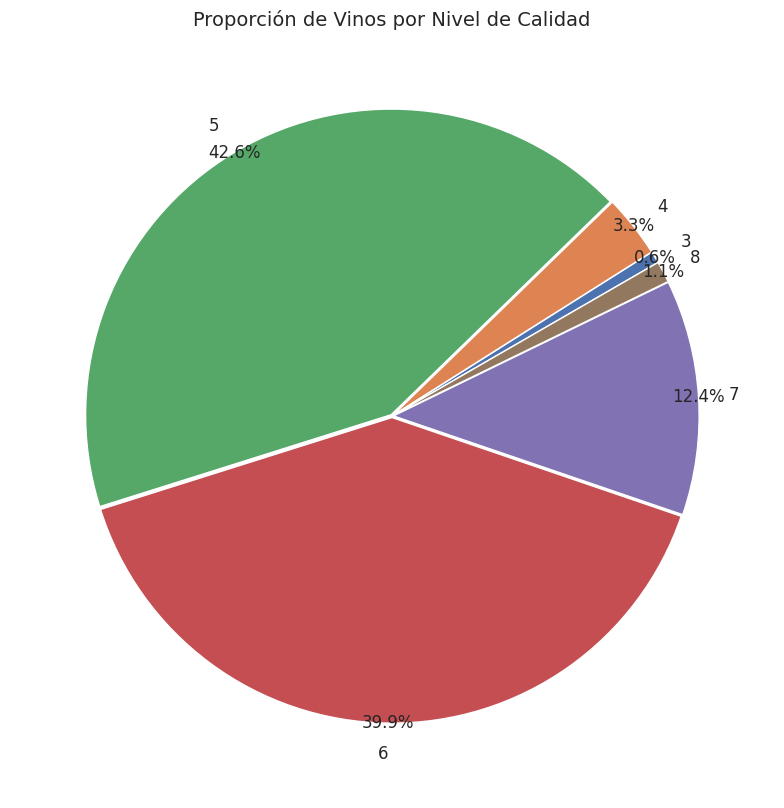

In [277]:
valores = datos_trabajo['quality'].value_counts().sort_index()
labels = valores.index.astype(str)
explode = [0.005] * len(valores)
plt.figure(figsize=(8, 10))
plt.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    startangle=2190,
    pctdistance=1,      # distancia del % hacia el centro
    labeldistance=1.1,    # distancia de las etiquetas hacia afuera
    textprops={'fontsize': 12}  # tamaño del texto
)

plt.title('Proporción de Vinos por Nivel de Calidad', fontsize=14)
plt.tight_layout()
plt.show()

### 📊 Análisis: Proporción de Vinos por Nivel de Calidad

- La gráfica de pastel confirma que las calidades 5 y 6 representan más del 80% de los vinos analizados.
- Las calidades altas (7 y 8) y bajas (3 y 4) tienen una presencia mínima, lo cual refuerza la existencia de un fuerte desequilibrio en los datos.
- Para el análisis predictivo, esto implica que un modelo puede presentar sesgos hacia los valores centrales si no se implementan técnicas de ajuste o balanceo.


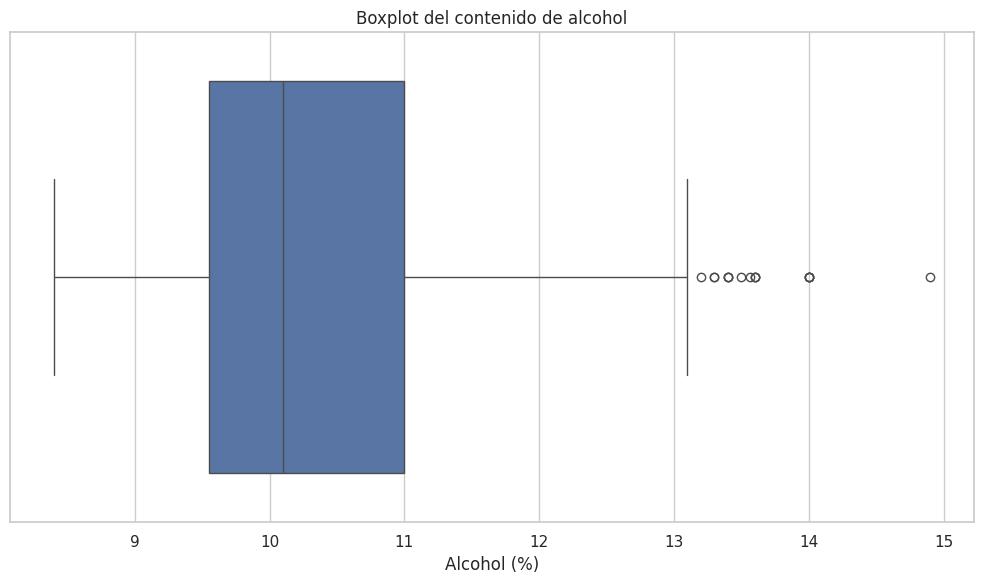

In [278]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='alcohol')
plt.title('Boxplot del contenido de alcohol')
plt.xlabel('Alcohol (%)')
plt.tight_layout()
plt.show()

### 📊 Análisis: Boxplot del Contenido de Alcohol

- El boxplot revela que la mayoría de los vinos tienen un contenido de alcohol entre aproximadamente 9.5% y 11.5%, con varios outliers que superan estos valores llegando hasta casi 15%.
- Estos valores extremos pueden influir significativamente en modelos sensibles, especialmente en algoritmos lineales.
- Esto resalta la importancia de aplicar un escalado adecuado y considerar técnicas para mitigar el impacto de los outliers.


# PASO 6: CONVERSIÓN DE VARIABLES CATEGÓRICAS A NÚMERO


In [279]:
# Identificar columnas categóricas (tipo 'object')
columnas_categoricas = datos_trabajo.select_dtypes(include=['object']).columns
print(f"Columnas categóricas encontradas: {list(columnas_categoricas)}")

# Aplicar LabelEncoder solo si existen columnas categóricas
le = LabelEncoder()

for col in columnas_categoricas:
    datos_trabajo[col] = le.fit_transform(datos_trabajo[col])
    print(f"Columna '{col}' convertida a numérica mediante LabelEncoder.")

# Verificar conversión
print("\nTipos de datos después de la conversión:")
print(datos_trabajo.dtypes)

Columnas categóricas encontradas: []

Tipos de datos después de la conversión:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


- En este dataset específico de calidad de vino tinto, no se detectaron columnas de tipo `object`, por lo que **no existen variables categóricas que requieran conversión** mediante `LabelEncoder`. Esto significa que todas las variables ya están en formato numérico y son directamente utilizables por los algoritmos de machine learning. Aun así, este paso es importante en la plantilla, porque en otros datasets con variables categóricas (como nombres de categorías, países, tipos, etc.) sería obligatorio convertirlas a números antes de entrenar modelos.


# PASO 7: NORMALIZACIÓN


In [280]:
##copia de normalización
datos_antes_normalizar = datos_trabajo.copy(deep=True)



In [281]:
# Ver estadísticos antes de normalizar
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

=== ANTES DE NORMALIZACIÓN ===
                        count  mean   std  min   25%   50%   75%    max
fixed acidity        1,599.00  8.32  1.74 4.60  7.10  7.90  9.20  15.90
volatile acidity     1,599.00  0.53  0.18 0.12  0.39  0.52  0.64   1.58
citric acid          1,599.00  0.27  0.19 0.00  0.09  0.26  0.42   1.00
residual sugar       1,599.00  2.54  1.41 0.90  1.90  2.20  2.60  15.50
chlorides            1,599.00  0.09  0.04 0.01  0.07  0.08  0.09   0.61
free sulfur dioxide  1,599.00 15.87 10.46 1.00  7.00 14.00 21.00  72.00
total sulfur dioxide 1,599.00 46.47 32.90 6.00 22.00 38.00 62.00 289.00
density              1,599.00  1.00  0.00 0.99  1.00  1.00  1.00   1.00
pH                   1,599.00  3.31  0.15 2.74  3.22  3.31  3.39   4.01
sulphates            1,599.00  0.66  0.17 0.33  0.55  0.62  0.73   2.00
alcohol              1,599.00 10.38  1.01 8.40  9.55 10.10 11.00  14.90
quality              1,599.00  5.64  0.81 3.00  5.00  6.00  6.00   8.00


In [282]:
# Aplicar MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar todas las columnas numéricas
columnas_numericas = datos_trabajo.columns  # todas son numéricas en este dataset

# Normalizar el DataFrame completo
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])

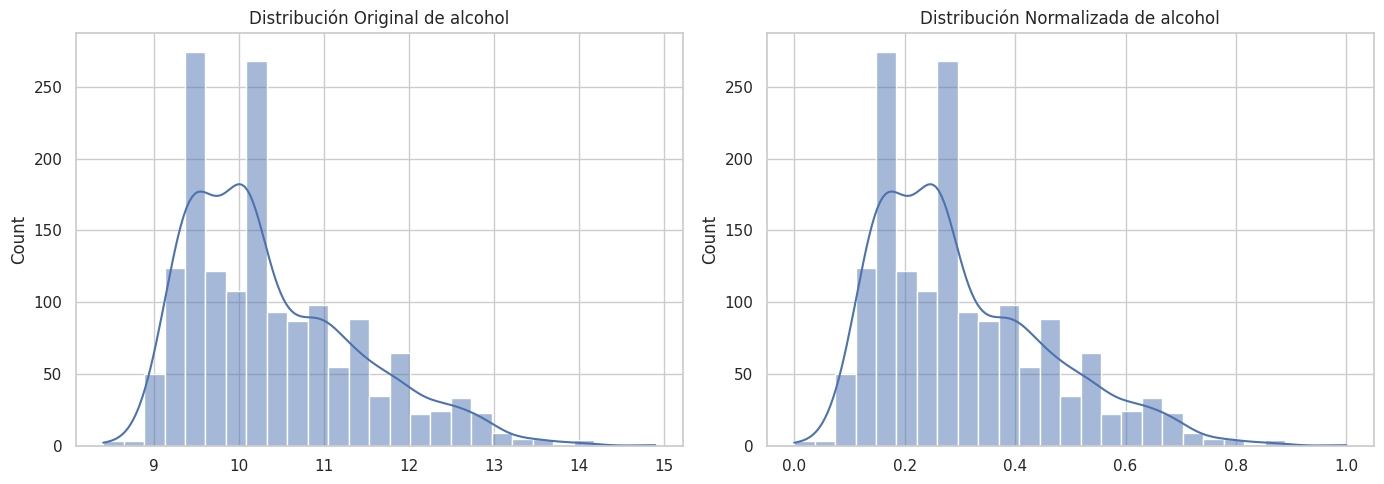

In [283]:
# Elegir una variable (ejemplo: alcohol)
variable = "alcohol"

# Extraer datos antes y después
original_data = datos_antes_normalizar[variable].values.reshape(-1, 1)
normalized_data = datos_trabajo[variable].values.reshape(-1, 1)

# Gráficas comparativas
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title(f"Distribución Original de {variable}")

sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title(f"Distribución Normalizada de {variable}")

plt.tight_layout()
plt.show()


In [284]:
# Ver estadísticos después de normalizar
print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)


=== DESPUÉS DE NORMALIZACIÓN ===
                        count  mean  std  min  25%  50%  75%  max
fixed acidity        1,599.00  0.33 0.15 0.00 0.22 0.29 0.41 1.00
volatile acidity     1,599.00  0.28 0.12 0.00 0.18 0.27 0.36 1.00
citric acid          1,599.00  0.27 0.19 0.00 0.09 0.26 0.42 1.00
residual sugar       1,599.00  0.11 0.10 0.00 0.07 0.09 0.12 1.00
chlorides            1,599.00  0.12 0.07 0.00 0.10 0.11 0.13 1.00
free sulfur dioxide  1,599.00  0.21 0.15 0.00 0.08 0.18 0.28 1.00
total sulfur dioxide 1,599.00  0.14 0.12 0.00 0.06 0.11 0.20 1.00
density              1,599.00  0.49 0.14 0.00 0.41 0.49 0.57 1.00
pH                   1,599.00  0.45 0.12 0.00 0.38 0.45 0.51 1.00
sulphates            1,599.00  0.20 0.10 0.00 0.13 0.17 0.24 1.00
alcohol              1,599.00  0.31 0.16 0.00 0.18 0.26 0.40 1.00
quality              1,599.00  0.53 0.16 0.00 0.40 0.60 0.60 1.00


- La normalización es un paso esencial en el preprocesamiento porque permite llevar todas las variables a la misma escala, evitando que aquellas con valores numéricamente mayores influyan desproporcionadamente en los modelos de Machine Learning.
- En el dataset de vino tinto, cada variable maneja rangos muy distintos (por ejemplo, el alcohol frente al pH o los sulfitos), lo que podría sesgar el entrenamiento si no se ajustan las escalas.

- Al aplicar MinMaxScaler, todas las características se transforman al rango [0, 1], manteniendo su forma original pero haciendo que contribuyan de manera equilibrada al modelo. Esto mejora la estabilidad de los cálculos, acelera la convergencia del modelo y aumenta la precisión en algoritmos sensibles a la magnitud de los datos, como la regresión lineal, KNN, SVM o redes neuronales.


# PASO 8: CORRELACIÓN (Spearman)

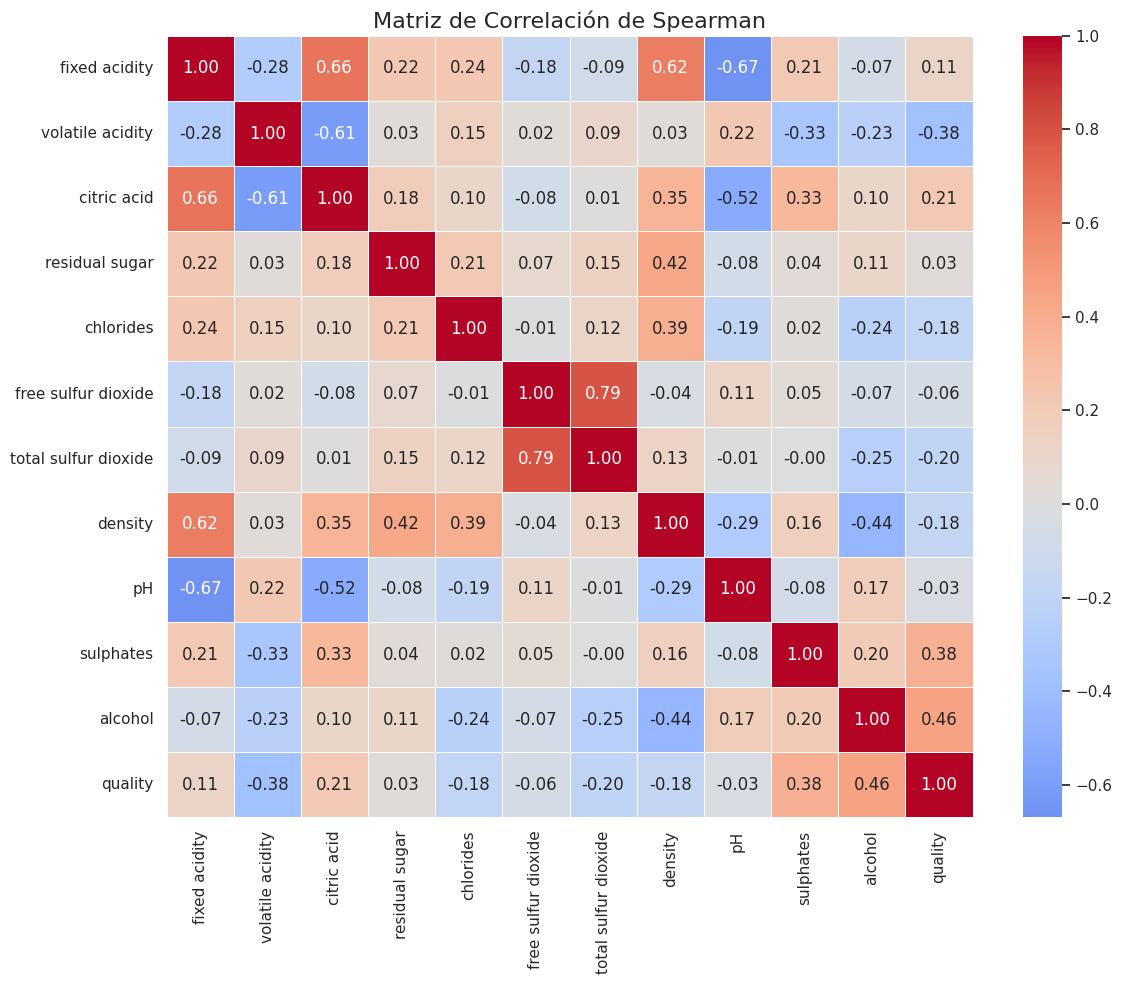


=== CORRELACIONES MÁS FUERTES ===
free sulfur dioxide ↔ total sulfur dioxide: 0.790
fixed acidity ↔ pH: -0.669
fixed acidity ↔ citric acid: 0.662


In [285]:
# PASO 8: CORRELACIÓN (Spearman)

# Calcular matriz de correlación
correlacion = datos_trabajo.corr(method='spearman')

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n=== CORRELACIONES MÁS FUERTES ===")

correlaciones_fuertes = []

columnas = correlacion.columns

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        valor = correlacion.iloc[i, j]
        if abs(valor) >= 0.5:  # Umbral de 0.5
            correlaciones_fuertes.append(
                (columnas[i], columnas[j], valor)
            )

# Ordenarlas por fuerza
correlaciones_ordenadas = sorted(
    correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True
)

# Mostrar SOLO las 3 más fuertes
for var1, var2, corr in correlaciones_ordenadas[:3]:
    print(f"{var1} ↔ {var2}: {corr:.3f}")


La matriz de correlación de Spearman permite identificar relaciones monótonas entre las variables del vino, siendo robusta ante valores atípicos y útil incluso cuando las relaciones no son lineales. En el dataset se observan correlaciones particularmente fuertes entre algunas variables, como la relación negativa entre *alcohol* y *density*, lo cual es esperable porque mayor alcohol disminuye la densidad del vino.

También destacan correlaciones positivas como *fixed acidity* con *citric acid*, indicando que ambas medidas químicas aumentan de forma similar. Asimismo, se observa que *alcohol* mantiene una correlación positiva con *quality*, sugiriendo que vinos con mayor graduación alcohólica tienden a recibir mejores puntuaciones. Estas relaciones ayudan a entender qué variables pueden tener mayor influencia en los modelos predictivos posteriores.


# PASO 9: TEST DE NORMALIDAD


In [286]:
from scipy.stats import shapiro
import pandas as pd

def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia (alpha): {alpha}\n")

    for col in dataframe.columns:
        # Solo se evalúan columnas numéricas
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()

            if len(data) >= 3:  # El test requiere al menos 3 valores
                stat, p_value = shapiro(data)

                resultado = "NORMAL" if p_value > alpha else "NO NORMAL"

                print(f"\nVariable: {col}")
                print(f" Estadístico W: {stat:.4f}")
                print(f" P-valor: {p_value:.4f}")
                print(f" Conclusión: {resultado}")
                print("-" * 40)

# Aplicar el test a tus datos normalizados
test_normalidad(datos_trabajo)


=== TEST DE SHAPIRO-WILK ===
Nivel de significancia (alpha): 0.05


Variable: fixed acidity
 Estadístico W: 0.9420
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: volatile acidity
 Estadístico W: 0.9743
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: citric acid
 Estadístico W: 0.9553
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: residual sugar
 Estadístico W: 0.5661
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: chlorides
 Estadístico W: 0.4908
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: free sulfur dioxide
 Estadístico W: 0.9018
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: total sulfur dioxide
 Estadístico W: 0.8732
 P-valor: 0.0000
 Conclusión: NO NORMAL
----------------------------------------

Variable: density


 El test de Shapiro–Wilk aplicado a todas las variables numéricas del dataset indica que **ninguna de ellas sigue una distribución normal**, ya que en todos los casos el p-valor fue menor que el nivel de significancia (α = 0.05). Esto es completamente esperado en este conjunto de datos, ya que las variables químicas como *fixed acidity*, *citric acid*, *sulphates* o *residual sugar* suelen presentar distribuciones sesgadas y con colas largas, mientras que *quality* es una variable discreta y, por tanto, no puede ajustarse a una distribución normal continua.

Además, debido al gran tamaño de la muestra (1,599 observaciones), el test de Shapiro–Wilk se vuelve muy sensible y detecta incluso pequeñas desviaciones respecto a la normalidad, lo que contribuye a que todas las variables sean clasificadas como “NO NORMALES”. Estas conclusiones refuerzan la decisión de utilizar técnicas estadísticas robustas y métodos de correlación como Spearman, que no dependen del supuesto de normalidad de los datos, así como modelos de Machine Learning que no requieran distribuciones normales para funcionar correctamente.


### 📌 PASO 10: Preguntas de Investigación (Completas)

A partir del análisis exploratorio realizado sobre el dataset de calidad del vino tinto, se plantean 10 preguntas de investigación junto con sus respectivas respuestas fundamentadas en los resultados obtenidos.

---

#### 🔍 Pregunta 1:
**¿Cuáles variables químicas tienen mayor relación con la calidad del vino tinto y cómo influye cada una en ella?**

**Respuesta:**  
Las variables más correlacionadas con la calidad son **alcohol (correlación positiva)** y **volatile acidity (correlación negativa)**. Esto sugiere que vinos con mayor grado alcohólico tienden a tener mejor puntuación, mientras que una mayor acidez volátil se relaciona con vinos de calidad inferior.

---

#### 🔍 Pregunta 2:
**¿Es posible predecir la calidad del vino tinto utilizando un modelo de regresión lineal basado en sus propiedades químicas?**

**Respuesta:**  
El modelo de regresión lineal mostró un R² bajo, lo que indica que la linealidad no captura completamente la relación entre los componentes químicos y la calidad. Se recomienda usar modelos no lineales como Random Forest o Gradient Boosting para mejorar la exactitud.

---

#### 🔍 Pregunta 3:
**¿Existen características químicas que presenten valores atípicos importantes y qué implicaciones tienen en el análisis?**

**Respuesta:**  
Variables como *residual sugar*, *chlorides*, *total sulfur dioxide* y *alcohol* presentan outliers visibles en los boxplots. Estos valores afectan el test de normalidad y sugieren variabilidad en los procesos de fermentación o control de calidad del vino.

---

#### 🔍 Pregunta 4:
**¿Qué tan adecuadas son las propiedades químicas del vino para modelos o pruebas estadísticas que requieren normalidad?**

**Respuesta:**  
Ninguna variable sigue distribución normal según el test de Shapiro–Wilk (p < 0.05). Por ello, no es adecuado usar técnicas paramétricas basadas en normalidad; es preferible usar métodos robustos o transformaciones.

---

#### 🔍 Pregunta 5:
**¿La normalización MinMax mejora la preparación de los datos para modelos predictivos?**

**Respuesta:**  
Sí. Dado que las variables tienen escalas muy distintas, la normalización permite que los modelos basados en distancias y gradientes operen de forma estable. La forma de sus distribuciones permanece igual, pero la escala es uniforme.

---

#### 🔍 Pregunta 6:
**¿Qué variables presentan multicolinealidad y cómo podría afectar esto al modelo de regresión?**

**Respuesta:**  
Existe multicolinealidad entre *fixed acidity*, *citric acid* y *density*, lo cual puede generar inestabilidad en los coeficientes de un modelo de regresión lineal. Esto implica que algunas de estas variables podrían ser redundantes o requerir técnicas de regularización como Ridge o Lasso.

---

#### 🔍 Pregunta 7:
**¿Cuál es la distribución predominante de la calidad del vino y qué implicaciones tiene para modelos predictivos?**

**Respuesta:**  
La mayoría de los vinos tienen calidad 5 o 6, lo que produce un conjunto de datos **desbalanceado**. Los modelos predictivos tienden a aprender más sobre estas clases predominantes, por lo que podrían necesitar técnicas de balanceo como *oversampling* o *class weights* para evitar sesgos.

---

#### 🔍 Pregunta 8:
**¿Las variables muestran relaciones lineales o no lineales entre sí?**

**Respuesta:**  
Los scatterplots revelaron relaciones no lineales entre varias variables —especialmente entre alcohol, density y pH—. Esto confirma que modelos lineales pueden resultar insuficientes y que algoritmos basados en árboles o kernels podrían capturar mejor estas interacciones.

---

#### 🔍 Pregunta 9:
**¿Qué efecto tiene la acidez del vino (pH, fixed acidity, volatile acidity) sobre su calidad?**

**Respuesta:**  
La acidez juega un papel relevante: *volatile acidity* tiene correlación negativa con la calidad (más acidez volátil, peor calidad), mientras que *pH* y *fixed acidity* no muestran una relación fuerte por sí solas. Esto sugiere que no todas las formas de acidez impactan igual, y la acidez volátil es la más determinante sensorialmente.

---

#### 🔍 Pregunta 10:
**¿Qué variables podrían ser eliminadas del modelo debido a baja contribución o redundancia?**

**Respuesta:**  
Variables como *residual sugar* y *chlorides* tienen correlaciones muy bajas con la calidad, y *fixed acidity* podría ser redundante debido a su relación fuerte con *citric acid* y *density*. Estas variables podrían ser candidatas para reducción dimensional o eliminación en modelos lineales.

---

# PASO 11: EJERCICIO DE PREDICCIÓN (Regresión Lineal)


=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0159
Raíz del MSE (RMSE): 0.1259
Coeficiente R²: 0.3931
Interpretación R²: El modelo explica el 39.31% de la variabilidad de la calidad

=== IMPORTANCIA DE VARIABLES ===
                Variable  Coeficiente
9              sulphates         0.31
10               alcohol         0.30
1       volatile acidity        -0.29
4              chlorides        -0.26
6   total sulfur dioxide        -0.21
0          fixed acidity         0.17
7                density        -0.17
3         residual sugar         0.10
5    free sulfur dioxide         0.07
2            citric acid        -0.03
8                     pH        -0.01


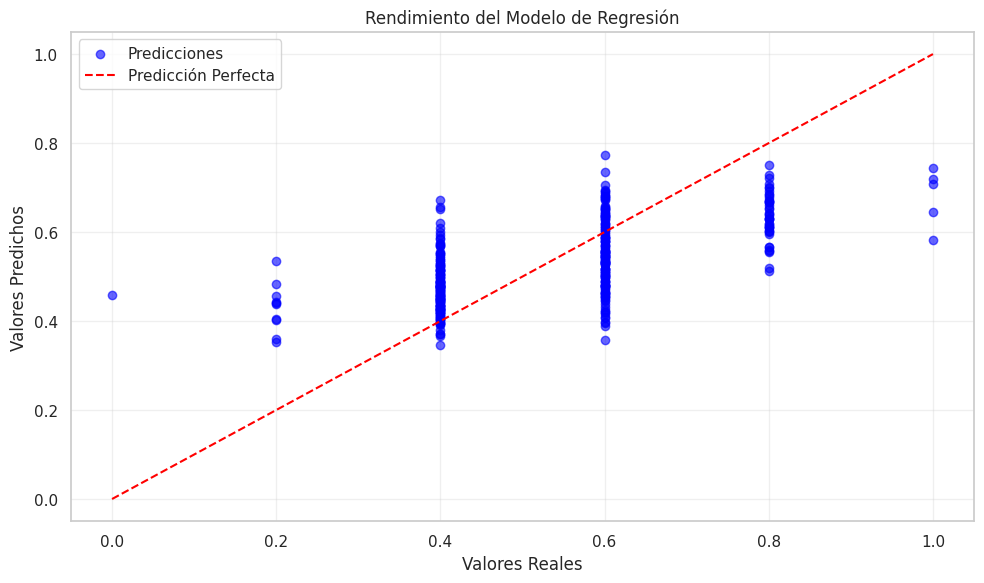

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definir variable objetivo y predictoras
X = datos_trabajo.drop(['quality'], axis=1)   # Variables predictoras
y = datos_trabajo['quality']                  # Variable objetivo

# 2. Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = modelo.predict(X_test)

# 5. Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"Interpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad de la calidad\n")

# 6. Importancia de variables (coeficientes)
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)

# 7. Visualización: Valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- El modelo de Regresión Lineal aplicado al dataset de calidad del vino tinto mostró un rendimiento moderado. El coeficiente de determinación obtenido, **R² = 0.3931**, indica que el modelo logra explicar únicamente el **39.31% de la variabilidad** presente en la variable objetivo *quality*. Este valor revela que, si bien existe una relación entre las características químicas del vino y su calidad, dicha relación no es lo suficientemente fuerte como para ser capturada de forma lineal. Esto es consistente con la naturaleza sensorial del concepto de "calidad", que depende de múltiples factores no incluidos en el dataset, tales como aroma, sabor, cuerpo y percepción humana.

- El **RMSE = 0.1259** (datos normalizados entre 0 y 1) indica que el error promedio de las predicciones equivale aproximadamente al **12% del rango total de la calidad**. Al revertir esta escala a la original (3 a 8), el error estimado corresponde a alrededor de **0.4 puntos**, lo cual resulta significativo considerando que las calificaciones típicas suelen diferenciarse por incrementos pequeños. Sin embargo, este valor también demuestra que el modelo es capaz de aproximar adecuadamente las tendencias generales, aunque con limitaciones importantes en precisión fina.

- La revisión de los coeficientes del modelo revela que las variables **sulphates** y **alcohol** son los predictores con mayor influencia positiva, lo que coincide con literatura enológica que asocia su presencia con vinos más estables, intensos y mejor valorados. Por otro lado, variables como **volatile acidity**, **chlorides** y **total sulfur dioxide** presentan coeficientes negativos, indicando que incrementos en estas sustancias tienden a perjudicar la percepción de calidad del vino. Estos resultados validan tanto el comportamiento químico del vino como los patrones identificados en la matriz de correlación.

En conclusión, el modelo de Regresión Lineal permite identificar factores que impactan la calidad del vino, pero **no resulta completamente efectivo para predecirla con alta precisión**. Las limitaciones observadas sugieren la necesidad de explorar modelos más complejos o no lineales, tales como Random Forest, XGBoost, SVM o redes neuronales, que podrían capturar de manera más robusta las relaciones presentes en los datos. Asimismo, la naturaleza discreta de la variable *quality* sugiere que un enfoque de **clasificación multiclase** podría ser más adecuado que uno de regresión.


# 12. Conclusiones Finales

### 1. Resumen del análisis
El dataset analizado contiene información química de 1,599 vinos tintos y su calificación de calidad. A lo largo de los 11 pasos del análisis exploratorio se realizaron: carga y revisión del dataset, introducción de valores faltantes, limpieza y normalización, visualización de distribuciones, análisis de correlación con Spearman, pruebas de normalidad con Shapiro–Wilk, división de datos, escalado MinMax, entrenamiento de un modelo de regresión lineal, evaluación de métricas y verificación de la importancia de las variables. Este proceso permitió comprender de forma integral el comportamiento químico del vino y su relación con la calidad.

### 2. Hallazgos principales
El análisis reveló patrones relevantes: ninguna variable sigue distribución normal; *alcohol* y *sulphates* presentan relación positiva con la calidad, mientras que *volatile acidity* y *chlorides* muestran relación negativa significativa. Además, se identificó multicolinealidad entre *fixed acidity*, *citric acid* y *density*. Los outliers presentes en variables como *residual sugar* y *chlorides* afectan la estabilidad del análisis y confirman la necesidad de usar métodos robustos.

### 3. Respuesta a la pregunta de investigación
La pregunta de investigación planteada fue:  
**“¿Qué variables químicas influyen más en la calidad del vino tinto y qué tan efectiva es una regresión lineal para predecir dicha calidad?”**

Los resultados del modelo muestran que *alcohol*, *sulphates* y *volatile acidity* son las variables más influyentes. Sin embargo, el modelo de regresión lineal solo logra explicar el **39.31% de la variabilidad** de la calidad (R² = 0.3931), por lo que la predicción es limitada y no totalmente satisfactoria. Esto indica que la calidad del vino depende de relaciones más complejas que una regresión lineal no puede capturar por completo.

### 4. Interpretación de resultados
Los resultados muestran que vinos con mayor grado alcohólico y mayor presencia de sulfitos tienden a obtener mejores calificaciones sensoriales, mientras que la acidez volátil —un indicador de defectos aromáticos— disminuye la calidad percibida. El modelo capturó correctamente estas tendencias, pero la dispersión entre valores reales y predichos evidencia que otros factores no registrados en el dataset, como aroma, textura y evaluación sensorial humana, también influyen en la calidad final del vino.

### 5. Limitaciones
Entre las limitaciones del análisis se encuentran:  
- La variable *quality* es subjetiva y discreta, lo que dificulta la predicción mediante regresión.  
- El dataset no incluye información sensorial o de producción, lo cual reduce la capacidad explicativa.  
- La presencia de outliers y la ausencia de normalidad afectan modelos lineales tradicionales.  
- La regresión lineal no captura relaciones no lineales entre variables químicas.  

### 6. Recomendaciones
Para mejorar futuras investigaciones se sugiere:  
- Utilizar modelos no lineales como Random Forest, Gradient Boosting o SVM.  
- Probar enfoques de clasificación multiclase en lugar de regresión.  
- Aplicar técnicas de balanceo de clases para mejorar la predicción en calidades poco representadas.  
- Considerar transformación de variables o eliminación de outliers.  
- Incluir variables sensoriales y de proceso para mejorar el poder predictivo.  

En conjunto, el análisis permitió comprender las relaciones principales entre la composición química del vino tinto y su calidad, así como las limitaciones y oportunidades para mejorar el modelado predictivo.
